In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
np.random.seed(0)
t = np.arange(0,100)
y = 0.5*t + np.random.normal(0,1,100)

In [8]:
data = pd.DataFrame({'Time': t , 'Value': y})
data.set_index('Time')

,Value
Time,
0,1.764052
1,0.900157
2,1.978738
3,3.740893
4,3.867558
...,...
95,48.206573
96,48.010500
97,50.285870


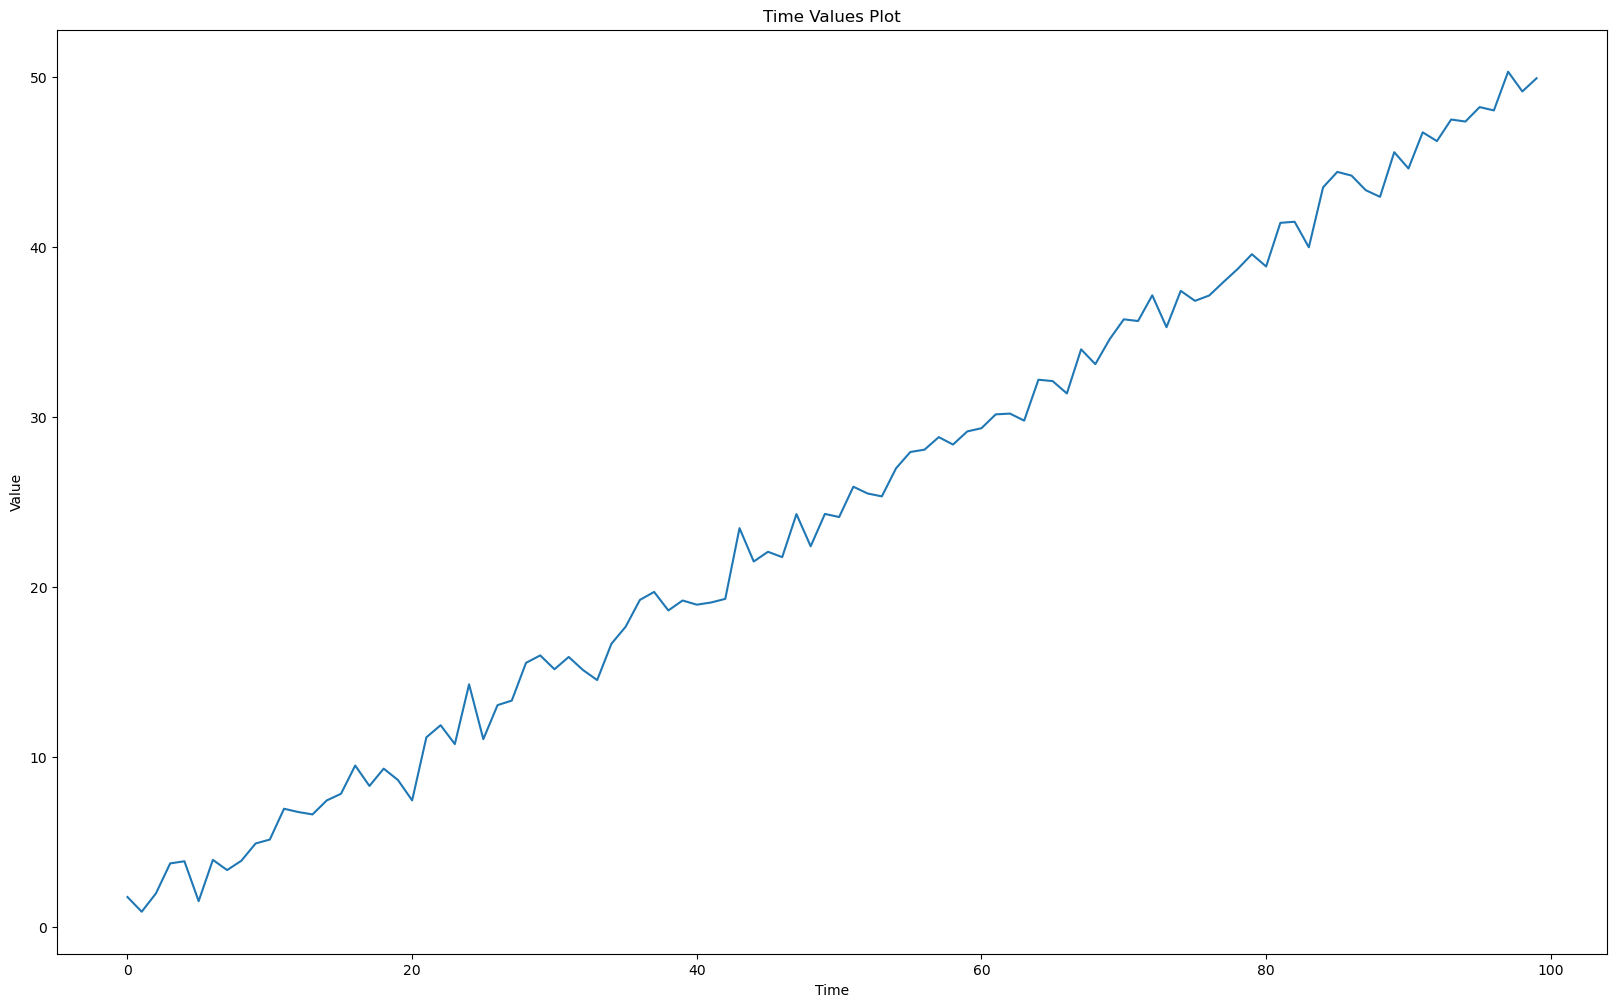

In [10]:
plt.figure(figsize=(20,12))
plt.plot(data['Time'], data['Value'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Values Plot')
plt.show()

In [14]:
result = sm.tsa.adfuller(data['Value'])
result

(2.0518533264722554,
 0.998736655331758,
 12,
 87,
 {'1%': -3.5078527246648834,
  '5%': -2.895382030636155,
  '10%': -2.584823877658872},
 250.13385081578372)

In [15]:
test_statistic, p_value, used_lag, nobs , critical_values, icbest = result 

In [18]:
print(f'Test Statistics: {test_statistic}')
print(f'P_value: {p_value}')
print(f'Used Lags: {used_lag}')
print(f'Critical Values:')
for index, value in critical_values.items():
    print(f'{index} : {value}')



Test Statistics: 2.0518533264722554
P_value: 0.998736655331758
Used Lags: 12
Critical Values:
1% : -3.5078527246648834
5% : -2.895382030636155
10% : -2.584823877658872


In [23]:
if p_value < 0.05:
        print('The time series is likely stationary (reject the null hypothesis).')
else: 
        print('The time series is likely non-stationary (accept the null hypothesis).')


The time series is likely non-stationary (accept the null hypothesis).


In [24]:
data['First Difference'] = data['Value'].diff()
data.dropna(inplace=True)

In [42]:
data['First Difference']

1    -0.863895
2     1.078581
3     1.762155
4     0.126665
5    -2.344836
        ...   
95    0.850207
96   -0.196073
97    2.275370
98   -1.158958
99    0.775077
Name: First Difference, Length: 99, dtype: float64

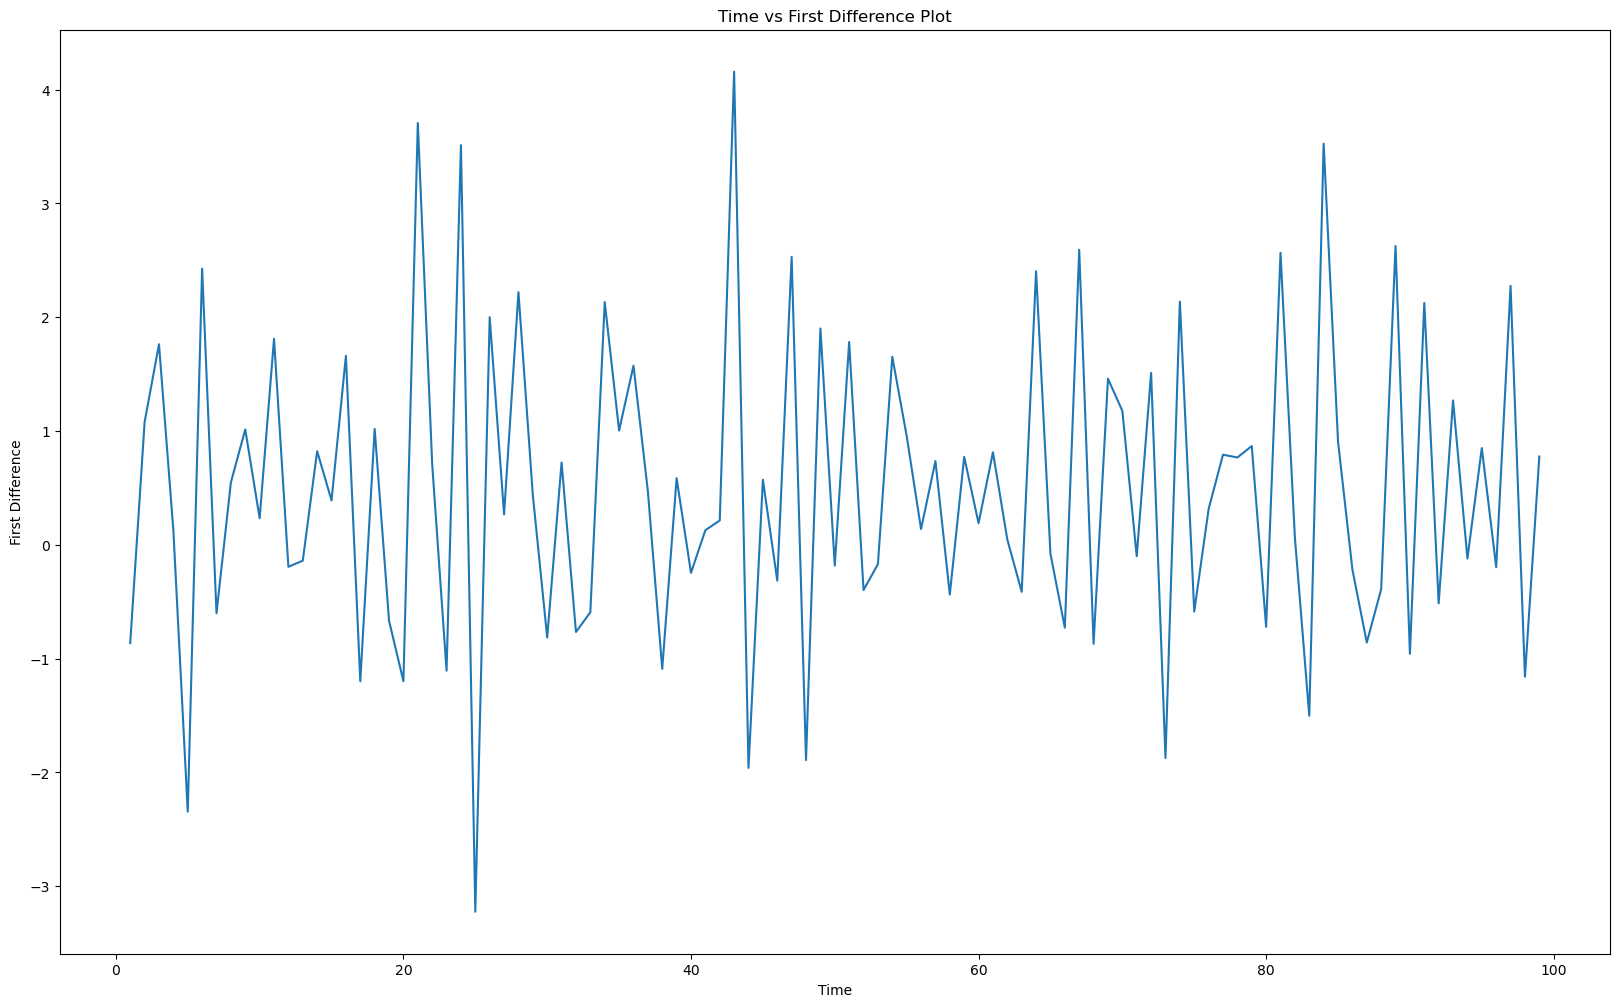

In [25]:
plt.figure(figsize=(20,12))
plt.plot(data['Time'], data['First Difference'])
plt.xlabel('Time')
plt.ylabel('First Difference')
plt.title('Time vs First Difference Plot')
plt.show()

In [26]:
result = sm.tsa.adfuller(data['First Difference'])
result

(-5.467994573779905,
 2.4343158141952514e-06,
 11,
 87,
 {'1%': -3.5078527246648834,
  '5%': -2.895382030636155,
  '10%': -2.584823877658872},
 251.11048595831642)

In [30]:
test_statistic, p_value, used_lag, nobs , critical_values, icbest = result 

In [31]:
print(f'Test Statistics: {test_statistic}')
print(f'P_value: {p_value}')
print(f'Used Lags: {used_lag}')
print(f'Critical Values:')
for index, value in critical_values.items():
    print(f'{index} : {value}')

Test Statistics: -5.467994573779905
P_value: 2.4343158141952514e-06
Used Lags: 11
Critical Values:
1% : -3.5078527246648834
5% : -2.895382030636155
10% : -2.584823877658872


In [32]:
if p_value < 0.05:
        print('The time series is likely stationary (reject the null hypothesis).')
else: 
        print('The time series is likely non-stationary (accept the null hypothesis).')


The time series is likely stationary (reject the null hypothesis).


In [36]:
from statsmodels.tsa.ar_model import AutoReg
lag_order = 1
ar_model = AutoReg(data['First Difference'],lags=lag_order)
ar_model_fit = ar_model.fit()

/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
ar_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:       First Difference   No. Observations:                   99
Model:                     AutoReg(1)   Log Likelihood                -153.441
Method:               Conditional MLE   S.D. of innovations              1.158
Date:                Sat, 21 Oct 2023   AIC                            312.882
Time:                        09:14:20   BIC                            320.637
Sample:                             1   HQIC                           316.019
                                   99                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7567      0.124      6.103      0.000       0.514       1.000
First Difference.L1    -0.5311      0.085     -6.246      0.000      -0.698      -0.364
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8830           +0.0000j            1.8830            0.5000
-----------------------------------------------------------------------------
"""

In [39]:
n = 5
future_predictions = ar_model_fit.predict(start=len(data), end=len(data)+n-1)
print(f'Future Predictions: {future_predictions}')

Future Predictions: 99     0.345064
100    0.573427
101    0.452153
102    0.516557
103    0.482354
dtype: float64


/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

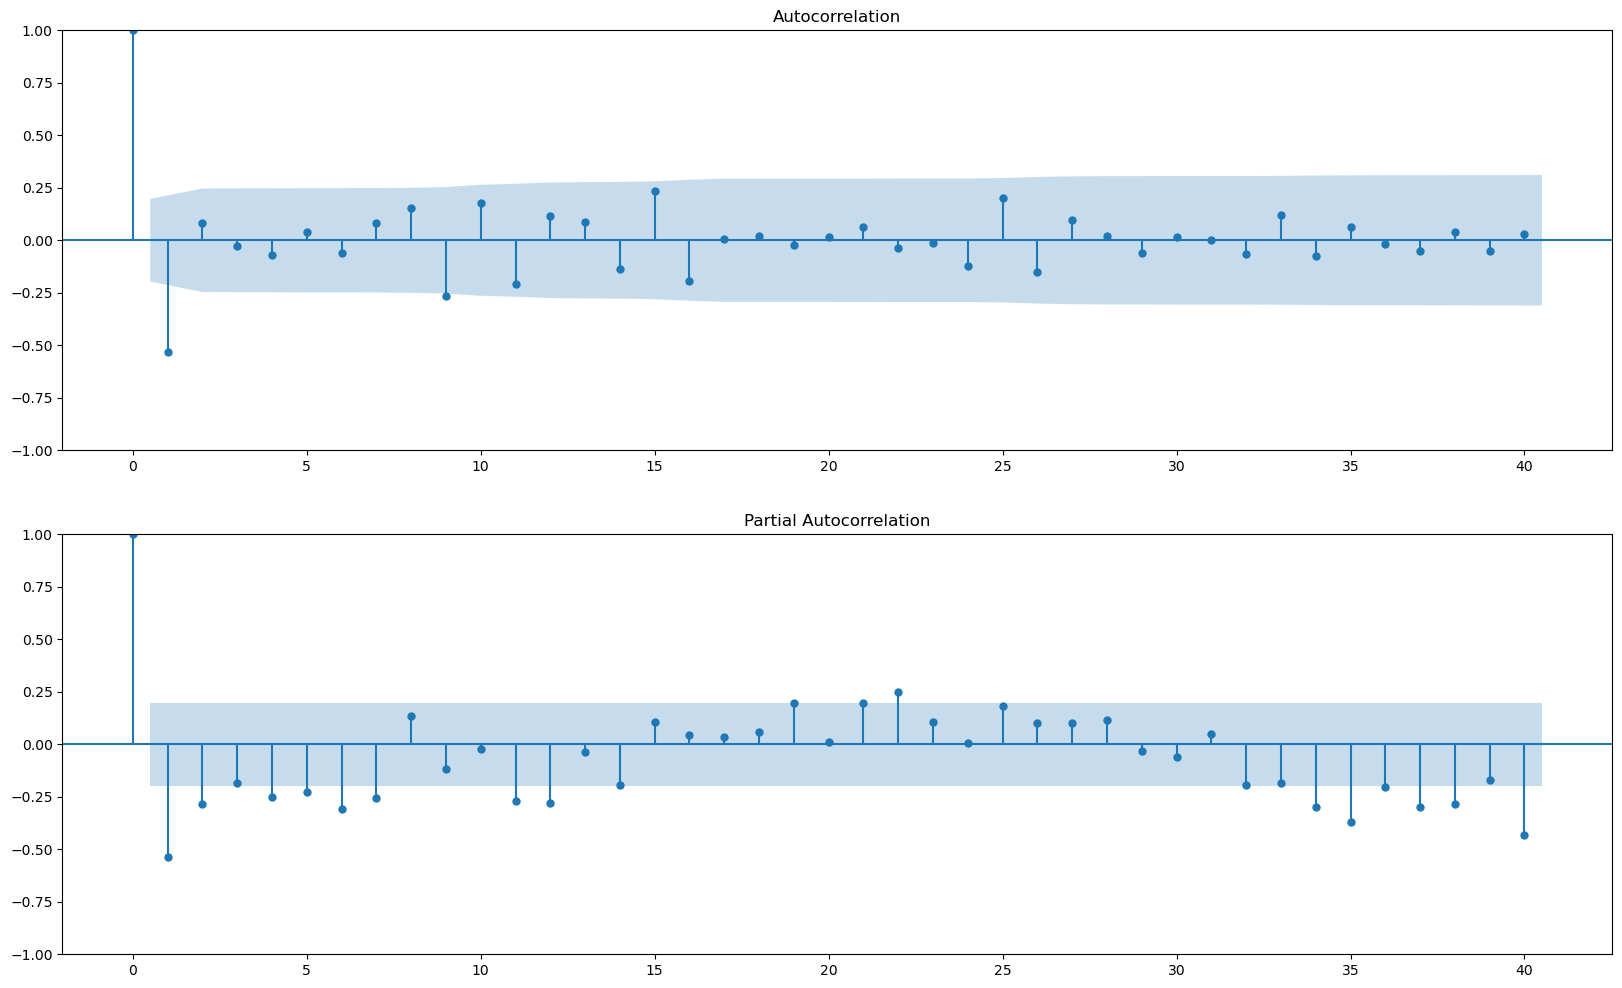

In [46]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(211)
fig = plot_acf(data["First Difference"], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data["First Difference"], lags=40, ax=ax2)


In [54]:
p,d,q = 1,1,0
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Value"],order=(p,d,q))
model_fit = model.fit()

/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [55]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                   99
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -169.405
Date:                Sat, 21 Oct 2023   AIC                            342.811
Time:                        10:12:01   BIC                            347.981
Sample:                             0   HQIC                           344.902
                                 - 99                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3543      0.101     -3.525      0.000      -0.551      -0.157
sigma2         1.8552      0.256      7.258      0.000       1.354       2.356
===================================================================================
Ljung-Box (L1) (Q):                   8.22   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.00   Prob(JB):                         0.72
Heteroskedasticity (H):               0.85   Skew:                             0.19
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

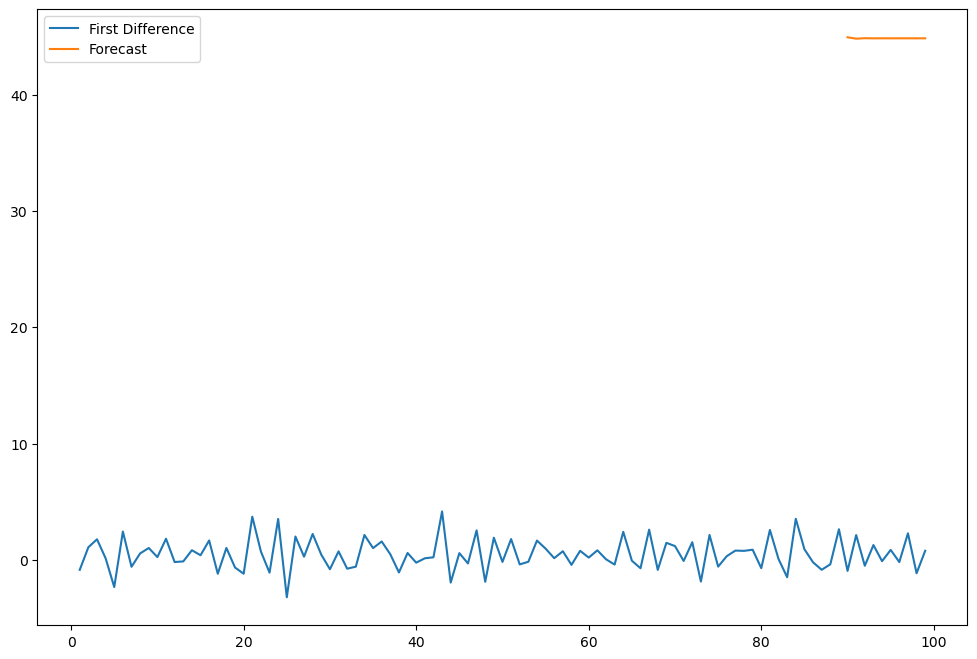

In [58]:
data['Forecast'] = model_fit.predict(start=90, end=103, dynamic=True)
data[['First Difference', 'Forecast']].plot(figsize=(12,8))

In [59]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['First Difference'],order=(1, 1, 0),seasonal_order=(1,1,1,12))
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86965D+00    |proj g|=  1.32915D-01

At iterate    5    f=  1.81441D+00    |proj g|=  4.62818D-03

At iterate   10    f=  1.81417D+00    |proj g|=  1.64091D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   1.641D-06   1.814D+00
  F =   1.8141692320330092     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

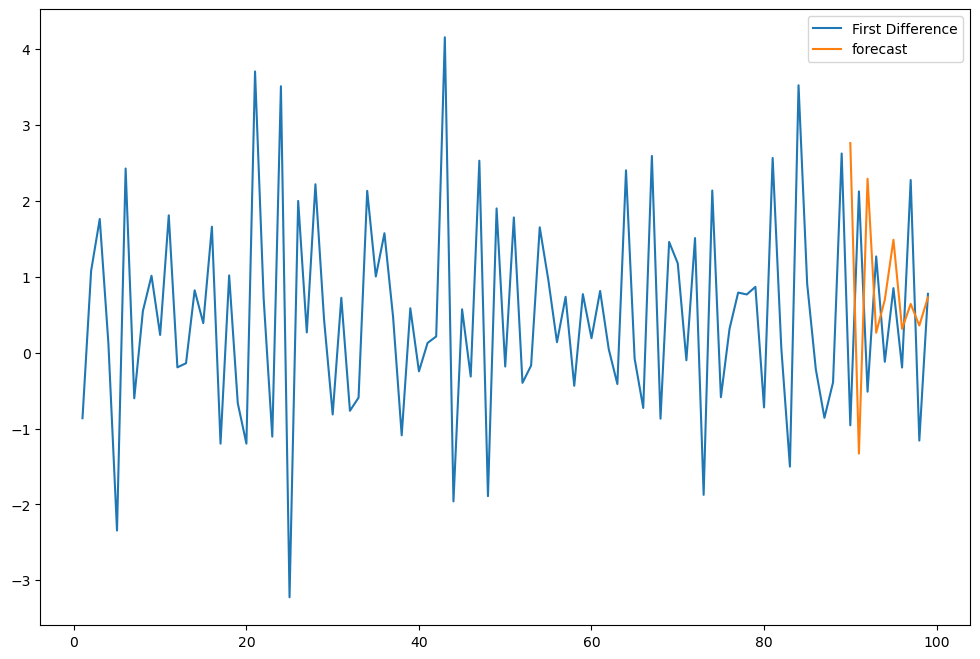

In [61]:
data['forecast']=results.predict(start=90,end=103,dynamic=True)
data[['First Difference','forecast']].plot(figsize=(12,8))

In [68]:
last_date = pd.to_datetime(data.index[-1])
from pandas.tseries.offsets import DateOffset
future_dates=[last_date + DateOffset(months=x)for x in range(0,24)]

/var/folders/81/71l2wpxd69198vw4y3vqct3w0000gn/T/ipykernel_74392/2450423190.py:3: UserWarning: Discarding nonzero nanoseconds in conversion.
  future_dates=[last_date + DateOffset(months=x)for x in range(0,24)]


In [69]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)
future_datest_df.tail()

,Time,Value,First Difference,Forecast,forecast
1971-08-01 00:00:00.000000099,NaN,NaN,NaN,NaN,NaN
1971-09-01 00:00:00.000000099,NaN,NaN,NaN,NaN,NaN
1971-10-01 00:00:00.000000099,NaN,NaN,NaN,NaN,NaN
1971-11-01 00:00:00.000000099,NaN,NaN,NaN,NaN,NaN
1971-12-01 00:00:00.000000099,NaN,NaN,NaN,NaN,NaN


In [70]:
future_df=pd.concat([data,future_datest_df])


/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sudhinkarki/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

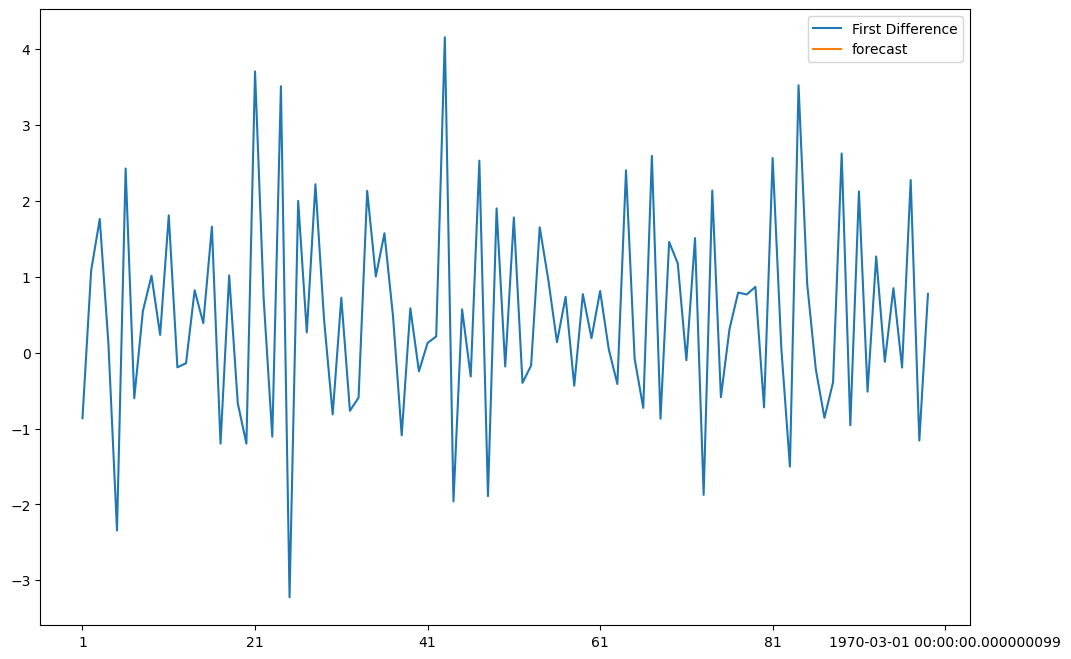

In [72]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['First Difference', 'forecast']].plot(figsize=(12, 8)) 